<a href="https://colab.research.google.com/github/Jacobmunoz88/modeladoysimulacion/blob/main/simulations_(Numerical_Approximation_of_solutions).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dinámica no lineal y caos – Capítulo 2 (Strogatz)

En este cuaderno se presentan ejercicios seleccionados de las secciones 2.1 a 2.4 del libro *Nonlinear Dynamics and Chaos* de Steven Strogatz.  
El objetivo es comprender la dinámica de sistemas de una variable y aplicar técnicas de estabilidad lineal a sistemas simples.

a) Sección 2.1 — Geometrical Way of Thinking

**Ejercicio elegido:** Analizar geométricamente el campo $\dot{x}=\sin(x)$, dibujar la familia de soluciones (trayectorias en el tiempo) y el diagrama de flujo en la recta.

**Explicación:**

La idea geométrica: Para $\dot{x}=f(x)$, se analiza la recta real como un eje con flechas (campo). Los puntos donde $f(x)=0$ son equilibrios.

En $\dot{x}=\sin(x)$, las raíces son $x=n\pi$, donde $n$ es un entero. El signo de $\sin(x)$ entre raíces determina hacia dónde se mueve $x(t)$.

Linealizando, $f'(x)=\cos(x)$: en $x=n\pi$ se tiene $f'(n\pi)=\cos(n\pi)=(-1)^n$. Así, los equilibrios con $n$ par son inestables (derivada positiva), y los con $n$ impar son estables (derivada negativa).

Gráficamente, se ven trayectorias que se mueven hacia los atractores $(2m+1)\pi$, donde $m$ es un entero.

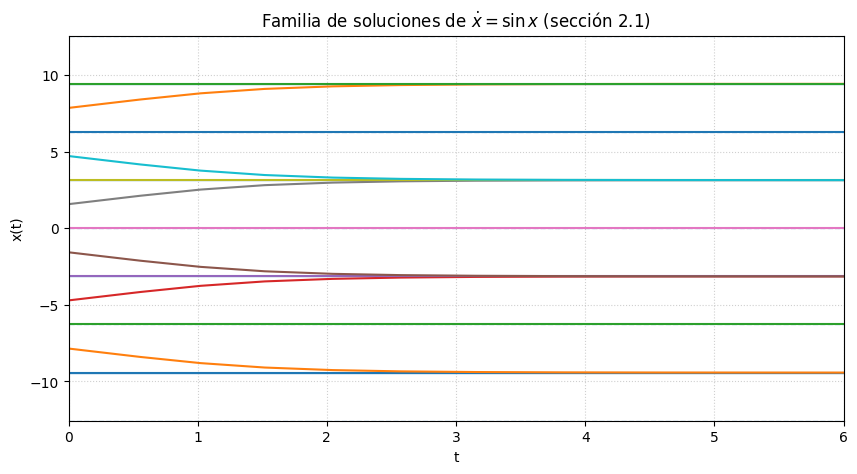

In [3]:

# # Sección 2.1: Visualización geométrica de \dot{x} = sin(x)
#
# Este notebook dibuja:
# - el campo de flujo en la recta (línea con flechas),
# - las soluciones x(t) para varias condiciones iniciales,
# - marcas en los puntos fijos x = n*pi con su estabilidad.

# %%
import numpy as np
import matplotlib.pyplot as plt
from mpmath import odefun
import math

# RHS
f = lambda x: math.sin(x)

# tiempo
t0, tmax = 0.0, 6.0
ts = np.linspace(t0, tmax, 400)

# condiciones iniciales (varias dentro de un intervalo)
x0_list = np.linspace(-3*math.pi, 3*math.pi, 13)

plt.figure(figsize=(10,5))

# dibujar puntos fijos a lo largo del eje vertical (para referencia)
ks = np.arange(-4, 5)
for k in ks:
    xk = k*math.pi
    stability = 'estable' if math.cos(xk) < 0 else 'inestable'
    if stability == 'estable':
        plt.hlines(xk, t0, tmax, linestyles='solid', linewidth=1.0, alpha=0.6)
    else:
        plt.hlines(xk, t0, tmax, linestyles='dashed', linewidth=1.0, alpha=0.4)

# resolver ODE numéricamente con mpmath para cada x0
for x0 in x0_list:
    rhs = lambda tt, yy: math.sin(yy)
    sol = odefun(rhs, t0, x0)
    xt = [sol(tt) for tt in ts]
    plt.plot(ts, xt, linewidth=1.5)

plt.xlabel('t')
plt.ylabel('x(t)')
plt.title(r'Familia de soluciones de $\dot{x}=\sin x$ (sección 2.1)')
plt.xlim(t0, tmax)
plt.ylim(-4*math.pi, 4*math.pi)
plt.grid(True, linestyle=':', alpha=0.6)
plt.show()


b) Sección 2.2 — FixedPointsandStability

**Ejercicio elegido (tipo):** Estudiar los equilibrios y su estabilidad para $\dot{x} = x - x^3$ — clásico y didáctico.

**Explicación (breve):**

Encontramos los puntos fijos resolviendo $x - x^3 = 0 \Rightarrow x(1 - x^2) = 0 \implies x^* = \{-1, 0, 1\}$.

La estabilidad por derivada: $f'(x) = 1 - 3x^2$.

*   En $x = -1$: $f'(-1) = 1 - 3 = -2 < 0 \implies$ estable.
*   En $x = 0$: $f'(0) = 1 > 0 \implies$ inestable.
*   En $x = 1$: $f'(1) = 1 - 3 = -2 < 0 \implies$ estable.

Geometría: el punto 0 repele, los $\pm 1$ atraen. Las soluciones ven cómo se alejan de 0 y se aproximan a $\pm 1$ según el signo inicial.

Puntos fijos y estabilidad:
  x* = -1.0, f'(x*) = -2.000 -> estable
  x* =  0.0, f'(x*) =  1.000 -> inestable
  x* =  1.0, f'(x*) = -2.000 -> estable


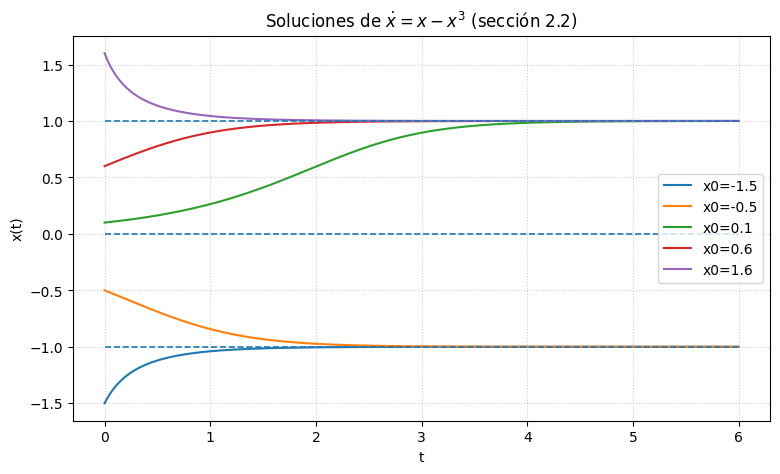

In [4]:

# # Sección 2.2: Puntos fijos y estabilidad para dot{x}=x-x^3
# Analizamos puntos fijos y graficamos flujo y soluciones.

# %%
import numpy as np
import matplotlib.pyplot as plt
from mpmath import odefun

# RHS y derivada
def f(x): return x - x**3
def fp(x): return 1 - 3*x**2

# calcular puntos fijos
# factorizar: x(1-x^2)=0
fixed_points = [-1.0, 0.0, 1.0]
stabilities = ['estable' if fp(x)<0 else 'inestable' if fp(x)>0 else 'indeterminado'
               for x in fixed_points]

print("Puntos fijos y estabilidad:")
for x, s in zip(fixed_points, stabilities):
    print(f"  x* = {x: .1f}, f'(x*) = {fp(x): .3f} -> {s}")

# Simulación de soluciones desde condiciones iniciales
t0, tmax = 0.0, 6.0
ts = np.linspace(t0, tmax, 400)
x0s = [-1.5, -0.5, 0.1, 0.6, 1.6]

plt.figure(figsize=(9,5))
for x0 in x0s:
    sol = odefun(lambda tt, yy: f(yy), t0, x0)
    xt = [sol(tt) for tt in ts]
    plt.plot(ts, xt, label=f"x0={x0}")
# marcas de equilibrios
for x in fixed_points:
    plt.hlines(x, t0, tmax, linestyles='--', linewidth=1.2)
plt.legend()
plt.xlabel('t'); plt.ylabel('x(t)')
plt.title(r'Soluciones de $\dot x = x - x^3$ (sección 2.2)')
plt.grid(True, linestyle=':', alpha=0.6)
plt.show()


c) Sección 2.3 — opulation Growth

**Ejercicio elegido (tipo):** resolver y graficar la ecuación logística $\dot{N} = rN(1 - N/K)$ (ejercicio clásico de la sección).

**Explicación (breve):**

La logística modela crecimiento con capacidad de carga $K$. Solución explícita (separable):

$N(t) = \frac{K}{1 + A e^{-rt}}$, con $A = \frac{K - N_0}{N_0}$.

Comportamiento: si $N_0 > 0$, $N(t) \to K$. El equilibrio $N=0$ es inestable; $N=K$ es estable.

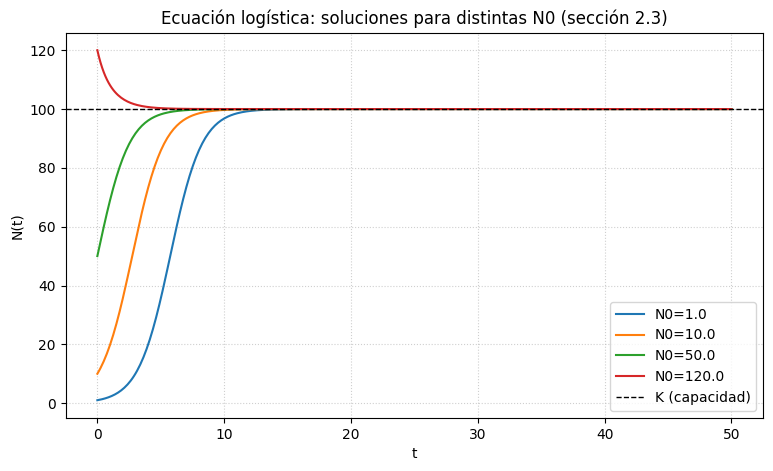

In [5]:

# # Sección 2.3: Modelo logístico N' = r N (1 - N/K)
# Solución analítica y comparativa con integración numérica.

# %%
import numpy as np
import matplotlib.pyplot as plt
from mpmath import odefun

# parámetros
r = 0.8   # tasa intrínseca
K = 100.0 # capacidad de carga

def logistic_rhs(t, N):
    return r * N * (1 - N / K)

# función solución analítica
def logistic_exact(t, N0):
    A = (K - N0) / N0
    return K / (1 + A * np.exp(-r * t))

# tiempo y condiciones
ts = np.linspace(0, 50, 400)
N0_list = [1.0, 10.0, 50.0, 120.0]

plt.figure(figsize=(9,5))
for N0 in N0_list:
    Nt_exact = logistic_exact(ts, N0)
    plt.plot(ts, Nt_exact, label=f"N0={N0}")

plt.axhline(K, color='k', linestyle='--', linewidth=1.0, label='K (capacidad)')
plt.xlabel('t'); plt.ylabel('N(t)')
plt.title('Ecuación logística: soluciones para distintas N0 (sección 2.3)')
plt.legend()
plt.grid(True, linestyle=':', alpha=0.6)
plt.show()


d) Sección 2.4 — Linear Stability Analysis

**Ejercicio elegido (tipo):** Analizar los puntos fijos y su estabilidad para $\dot{x} = x^2(6-x)$.

**Enunciado:** $\dot{x} = x^2(6-x)$.

**Puntos fijos:** Los equilibrios se obtienen resolviendo $x^2(6-x) = 0$. Por tanto, $x^* = 0$ (raíz de multiplicidad 2) y $x^* = 6$.

**Derivada (para análisis lineal):** Sea $f(x) = x^2(6-x) = 6x^2 - x^3$. Entonces $f'(x) = \frac{d}{dx}(6x^2 - x^3) = 12x - 3x^2 = 3x(4-x)$.

*   En $x^* = 6$: $f'(6) = 3 \cdot 6 (4-6) = 18(-2) = -36 < 0$. $\implies$ Estable (atractor): las trayectorias cercanas convergen hacia $x=6$.

*   En $x^* = 0$: $f'(0) = 0$. La prueba lineal falla (no concluyente) porque la derivada es cero. Necesitamos un argumento gráfico / no lineal.

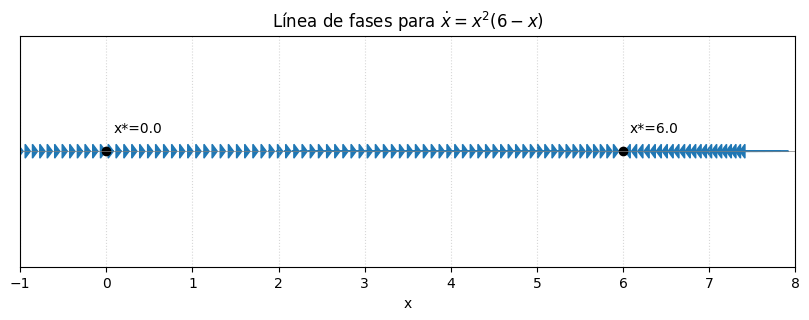

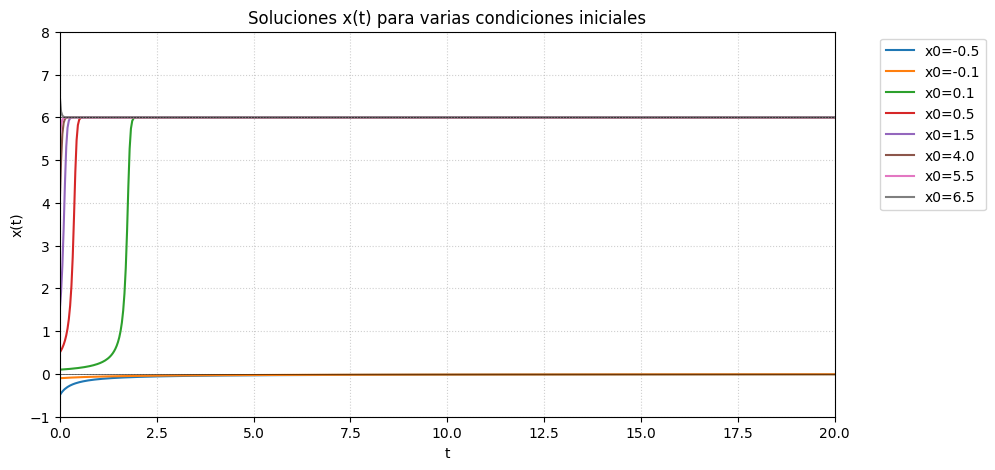

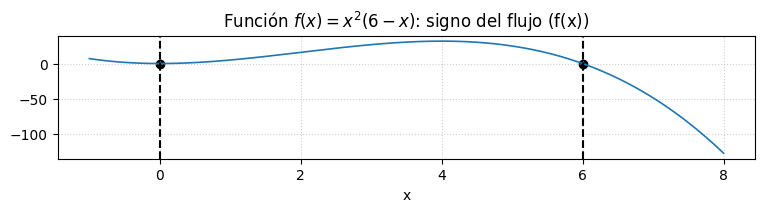

In [7]:
# === Ejercicio 2.4.4: dot x = x^2 (6 - x) ===
# Dibuja la línea de fases y algunas soluciones x(t).
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Definir RHS
def f(t, x):
    return x**2 * (6 - x)

# 1) Puntos fijos
fixed_points = [0.0, 6.0]

# 2) Dibujo de la "línea de fases" (campo escalar en el eje x)
x_vals = np.linspace(-1.0, 8.0, 800)   # rango visual
fx = x_vals**2 * (6 - x_vals)

plt.figure(figsize=(10,3))
# graficar línea de fases: representamos flechas horizontales
y0 = np.zeros_like(x_vals)  # graficamos sobre una línea y=0
# Normalizar para tamaño de flecha
maxabs = np.max(np.abs(fx)) + 1e-12
sc = 0.6  # escala visual
for xi, vi in zip(x_vals[::8], fx[::8]):  # muestreamos para no saturar
    dx = (vi / maxabs) * sc
    plt.arrow(xi, 0, dx, 0, head_width=0.06, head_length=0.06, fc='C0', ec='C0', length_includes_head=True)

# Marcar puntos fijos
for p in fixed_points:
    plt.plot(p, 0, 'ko', markersize=6)
    plt.text(p + 0.08, 0.08, f'x*={p}', fontsize=10)

plt.axhline(0, color='gray', linewidth=0.5)
plt.ylim(-0.5, 0.5)
plt.xlim(x_vals[0], x_vals[-1])
plt.title(r'Línea de fases para $\dot x = x^2(6-x)$')
plt.yticks([])
plt.xlabel('x')
plt.grid(axis='x', linestyle=':', alpha=0.5)
plt.show()

# 3) Simular algunas soluciones x(t) (integración numérica hacia adelante y hacia atrás)
t_span_forward = (0, 20)
t_span_backward = (0, -10)
t_eval_fwd = np.linspace(t_span_forward[0], t_span_forward[1], 600)
t_eval_bwd = np.linspace(t_span_backward[0], t_span_backward[1], 600)

# condiciones iniciales para explorar ambos lados de x=0 y cercanas a x=6
ICs = [-0.5, -0.1, 0.1, 0.5, 1.5, 4.0, 5.5, 6.5]

plt.figure(figsize=(10,5))
for ic in ICs:
    # integrar hacia adelante
    sol_fwd = solve_ivp(f, t_span_forward, [ic], t_eval=t_eval_fwd, rtol=1e-8, atol=1e-10)
    plt.plot(sol_fwd.t, sol_fwd.y[0], label=f'x0={ic}')
plt.axhline(0, color='k', linewidth=0.4)
plt.axhline(6, color='k', linewidth=0.4, linestyle='--')
plt.ylim(-1.0, 8.0)
plt.xlim(t_eval_fwd[0], t_eval_fwd[-1])
plt.xlabel('t')
plt.ylabel('x(t)')
plt.title('Soluciones x(t) para varias condiciones iniciales')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.grid(linestyle=':', alpha=0.6)
plt.show()

# 4) Plano simplificado: mostrar dirección del flujo en el eje x con colores (opcional)
plt.figure(figsize=(9,1.6))
plt.plot(x_vals, fx, '-', lw=1.2)
plt.axvline(0, color='k', ls='--')
plt.axvline(6, color='k', ls='--')
plt.scatter(fixed_points, [0,0], c='k')
plt.xlabel('x')
plt.title(r'Función $f(x)=x^2(6-x)$: signo del flujo (f(x))')
plt.grid(linestyle=':', alpha=0.6)
plt.show()
